In [1]:
!pip install prophet
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [3]:
#initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

# **Import Dataset and Explore**

In [4]:
df= pd.read_csv('/content/TCS.NS.csv')

In [5]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-22,2661.000000,2686.649902,2638.100098,2671.149902,2606.325439,5262294
1,2020-10-23,2687.800049,2702.000000,2670.100098,2686.800049,2621.595703,3499091
2,2020-10-26,2689.949951,2709.949951,2670.500000,2688.199951,2622.961914,2672752
3,2020-10-27,2699.750000,2718.149902,2624.100098,2630.149902,2566.320313,3537502
4,2020-10-28,2650.000000,2655.949951,2606.000000,2622.199951,2558.563477,3569445


In [6]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
492,2022-10-17,3072.649902,3128.399902,3071.449951,3111.750000,3111.750000,1517005
493,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722
494,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289
495,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601
496,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       497 non-null    object 
 1   Open       497 non-null    float64
 2   High       497 non-null    float64
 3   Low        497 non-null    float64
 4   Close      497 non-null    float64
 5   Adj Close  497 non-null    float64
 6   Volume     497 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.3+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,497.000000,497.000000,497.000000,497.000000,497.000000,4.970000e+02
mean,3322.946880,3353.508748,3288.843367,3320.557543,3273.244740,2.699047e+06
std,322.140737,323.157771,318.879413,321.416159,324.135913,1.313728e+06
min,2604.000000,2655.000000,2600.050049,2604.600098,2541.391113,2.988190e+05
25%,3107.800049,3141.399902,3082.100098,3112.949951,3066.314209,1.809339e+06
50%,3284.000000,3315.000000,3255.000000,3274.949951,3234.645020,2.365509e+06
75%,3582.649902,3617.000000,3542.000000,3581.600098,3532.902100,3.203686e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502930,1.184540e+07


# **Visualization**

In [28]:
px.bar(df, x="Date", y="Close", color='Close')

In [31]:
px.area(df, x="Date", y="Volume")

In [11]:
#close price value of last 3 years
px.box(df, y="Close")

# **Data Preparation**

In [12]:
columns=['Date', "Close"]
ndf= pd.DataFrame(df, columns=columns)

In [13]:
ndf

,Date,Close
0,2020-10-22,2671.149902
1,2020-10-23,2686.800049
2,2020-10-26,2688.199951
3,2020-10-27,2630.149902
4,2020-10-28,2622.199951
...,...,...
492,2022-10-17,3111.750000
493,2022-10-18,3144.699951
494,2022-10-19,3121.850098
495,2022-10-20,3157.300049


In [14]:
prophet_df= ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [15]:
prophet_df

,ds,y
0,2020-10-22,2671.149902
1,2020-10-23,2686.800049
2,2020-10-26,2688.199951
3,2020-10-27,2630.149902
4,2020-10-28,2622.199951
...,...,...
492,2022-10-17,3111.750000
493,2022-10-18,3144.699951
494,2022-10-19,3121.850098
495,2022-10-20,3157.300049


# **Create Model**

In [16]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0esw82uz/vdes48m7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0esw82uz/9cdqo8ct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34049', 'data', 'file=/tmp/tmp0esw82uz/vdes48m7.json', 'init=/tmp/tmp0esw82uz/9cdqo8ct.json', 'output', 'file=/tmp/tmp0esw82uz/prophet_modelh74489hs/prophet_model-20221022101708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:17:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:17:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Forecasting**

In [17]:
future= m.make_future_dataframe(periods=30)
forecast= m.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-22,2591.776948,2445.620984,2742.391587,2591.776948,2591.776948,4.223106,4.223106,4.223106,4.223106,4.223106,4.223106,0.0,0.0,0.0,2596.000054
1,2020-10-23,2597.017776,2444.770695,2759.344452,2597.017776,2597.017776,2.533275,2.533275,2.533275,2.533275,2.533275,2.533275,0.0,0.0,0.0,2599.551051
2,2020-10-26,2612.740261,2451.056101,2764.111900,2612.740261,2612.740261,-1.602023,-1.602023,-1.602023,-1.602023,-1.602023,-1.602023,0.0,0.0,0.0,2611.138238
3,2020-10-27,2617.981089,2467.109653,2766.317159,2617.981089,2617.981089,3.425894,3.425894,3.425894,3.425894,3.425894,3.425894,0.0,0.0,0.0,2621.406983
4,2020-10-28,2623.221917,2478.603654,2770.847512,2623.221917,2623.221917,6.840856,6.840856,6.840856,6.840856,6.840856,6.840856,0.0,0.0,0.0,2630.062773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,2022-11-16,2970.823507,2826.002673,3125.326565,2956.781755,2985.861233,6.840856,6.840856,6.840856,6.840856,6.840856,6.840856,0.0,0.0,0.0,2977.664363
523,2022-11-17,2968.404291,2823.937206,3124.687005,2952.891140,2984.470086,4.223106,4.223106,4.223106,4.223106,4.223106,4.223106,0.0,0.0,0.0,2972.627397
524,2022-11-18,2965.985075,2818.388922,3117.348661,2949.154061,2983.171214,2.533275,2.533275,2.533275,2.533275,2.533275,2.533275,0.0,0.0,0.0,2968.518350
525,2022-11-19,2963.565859,2764.572134,3068.842017,2945.307317,2981.867577,-50.431701,-50.431701,-50.431701,-50.431701,-50.431701,-50.431701,0.0,0.0,0.0,2913.134158


In [34]:
px.line(forecast, x='ds', y='yhat')

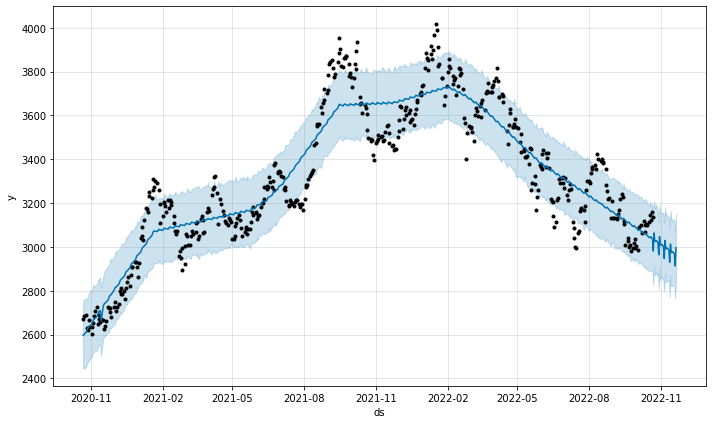

In [20]:
figure= m.plot(forecast, xlabel='ds', ylabel='y')

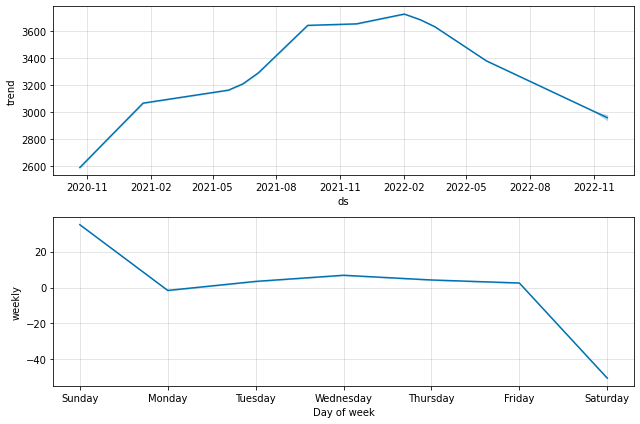

In [21]:
figure2= m.plot_components(forecast)